# **Project Title :-**
## **Chronic Kidney Disease Prediction Using Machine Learning Algorithms**

# **Objective**

# **Data Source**

The dataset taken from the kaggle website which is free to use.The dataset contains 400 rows and 26 columns.The dataset has the 26 features as follows with data types :  


1.   age                             :-  float64
2.   bp[blood pressure]              :-  float64
3.   sg['specific_gravity']          :-  float64
4.   al['albumin']                   :-  float64
5.   su['sugar']                     :-  float64
6.   rbc ['red_blood_cells']         :-  object
7.   pc ['pus_cell',]                :-  object
8.   pcc['pus_cell_clumps']          :-  object
9.   ba['bacteria']                  :-  object
10.  bgr ['blood_glucose_random']    :-  float64
11.  bu['blood_urea']                :-  float64
12.  sc ['serum_creatinine']         :-  float64
13.  sod ['sodium']                  :-  float64
14.  pot  ['potassium']              :-  float64
15.  hemo['haemoglobin']             :-  float64
16.  pcv['packed_cell_volume']       :-  object
17.  wc ['white_blood_cell_count']   :-  object
18.  rc ['red_blood_cell_count']     :-  object
19.  htn ['hypertension']            :-  object
20.  dm  ['diabetes_mellitus']       :-  object
21.  cad ['coronary_artery_disease'] :-  object
22.  appet ['appetite']              :-  object
23.  pe ['peda_edema']               :-  object
24.  ane ['aanemia']                 :-  object
25.  classification                  :-  object


Dataset Link :-https://raw.githubusercontent.com/patilgirish815/Kidney_Cancer_Prediction_Using_Machine_Learning/main/dataset/kidney_disease.csv

# **Import Library**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msn
# import plotly.express as px

# **Import Data**

## **Reading CSV file from Local Drive**

In [20]:
df=pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## **Reading CSV file using url file path**

# **Describe Data**

### **Shape function:-**
##### The shape function shows the no. of rows and the no. of columns

In [21]:
df.shape

(400, 26)

### **Head function:-**
##### The shape function shows the 5 records

In [22]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### **Tail function:-**
##### The shape function shows the last 5 records

In [23]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


### **Describe function:-**
##### The describe function shows the average , minimum ,standard deviation ,maximum,count 25% of column,50% of column,75% of column of the each column.

In [24]:
df.describe(include="all")

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Info function:-**
##### The info function shows no. of null values in the each column and the data type of the each column.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

### **dtypes function:-**
##### The dtypes function shows data type of each column.

In [26]:
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


# **Data Preprocessing**

### **isnull function:-**
##### The isnull function shows null values present in each column.

In [27]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [31]:
# Fill missing values for numerical columns with mean
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values for categorical columns with mode (most frequent value)
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'wc', 'rc', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if any missing values remain
print(df.isnull().sum())


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


<ipython-input-31-99e7b040bf8a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-31-99e7b040bf8a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [33]:

# Descriptive statistics for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


               id         age          bp          sg          al          su  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   16.974966   13.476298    0.005369    1.272318    1.029487   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.015000    0.000000    0.000000   
50%    199.500000   54.000000   78.234536    1.017408    1.000000    0.000000   
75%    299.250000   64.000000   80.000000    1.020000    2.000000    0.450142   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     74.782634   49.285887 

In [34]:
# Clean and convert object numerics to float
for col in ['pcv', 'wc', 'rc']:
    df[col] = df[col].astype(str).str.strip().str.replace(r'\D', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')


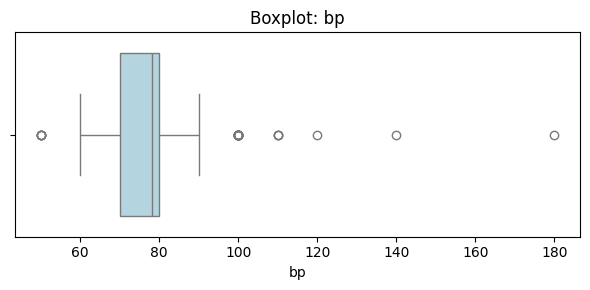

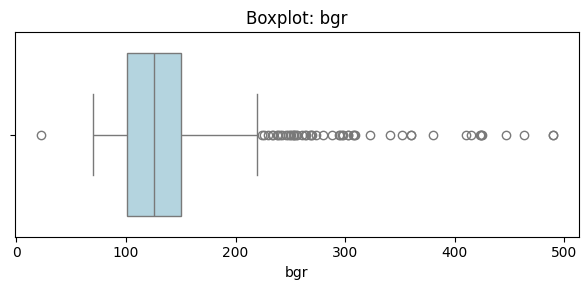

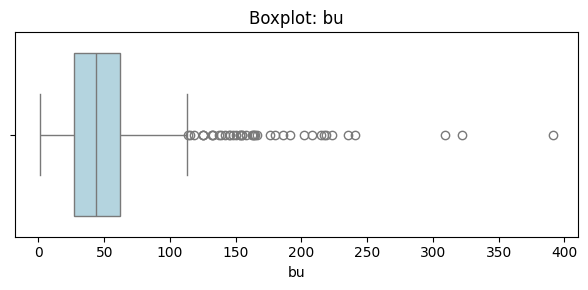

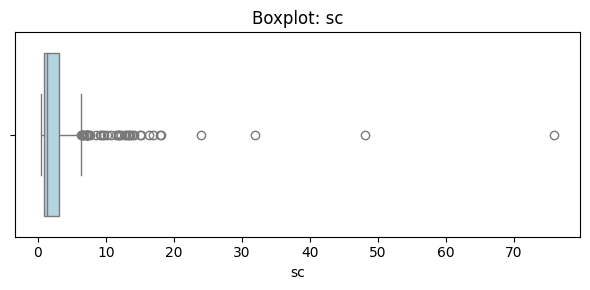

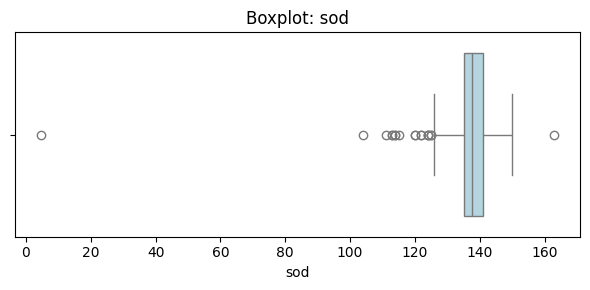

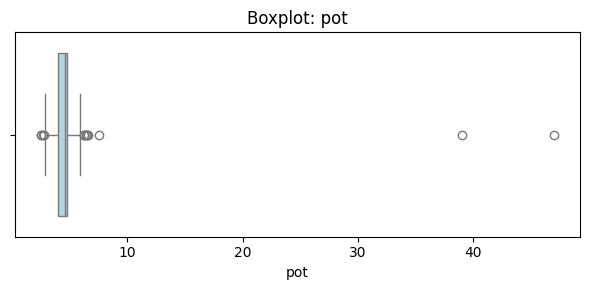

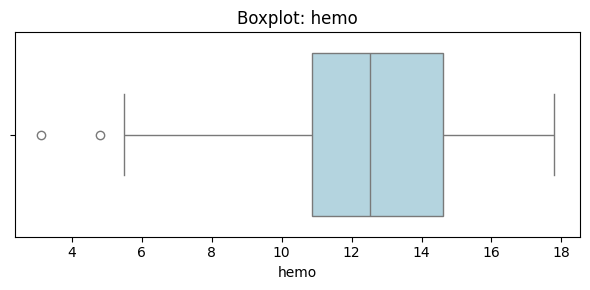

In [35]:
outlier_cols = ['bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for col in outlier_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()


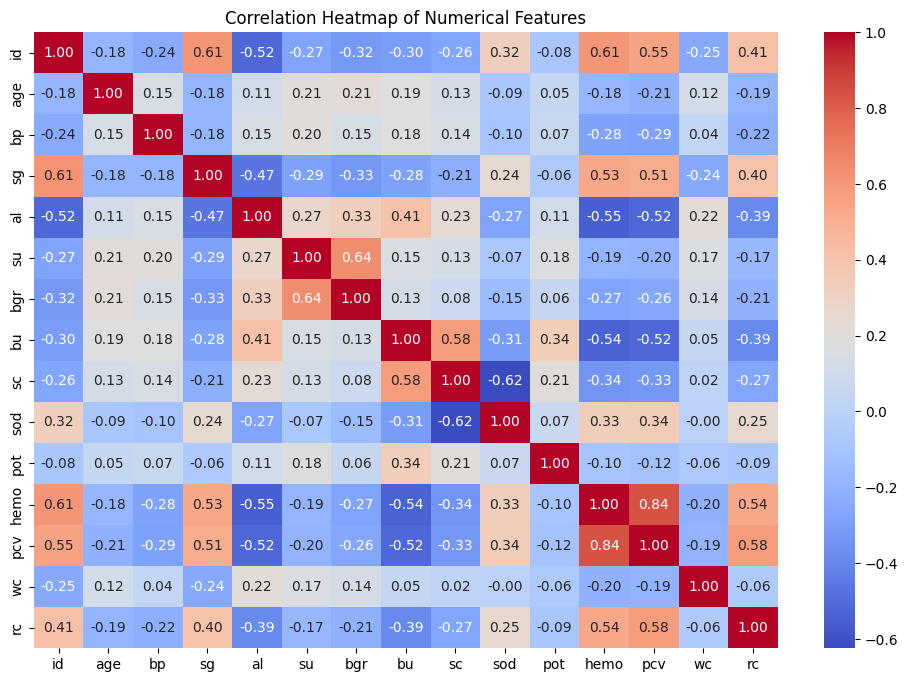

In [37]:
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
# Calculate correlation only on the numerical dataframe
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<ipython-input-38-2d299e1e7516>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification', palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


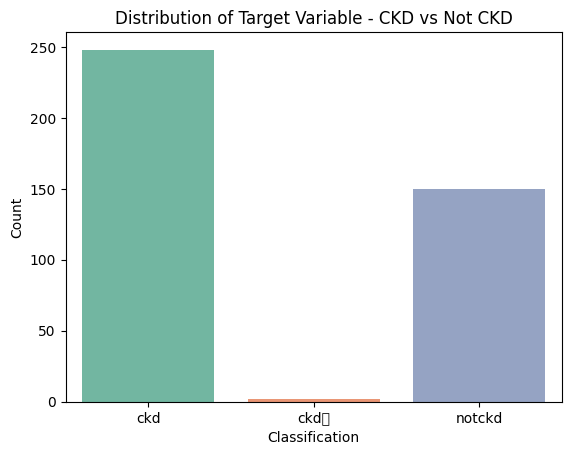

In [38]:
sns.countplot(data=df, x='classification', palette='Set2')
plt.title("Distribution of Target Variable - CKD vs Not CKD")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


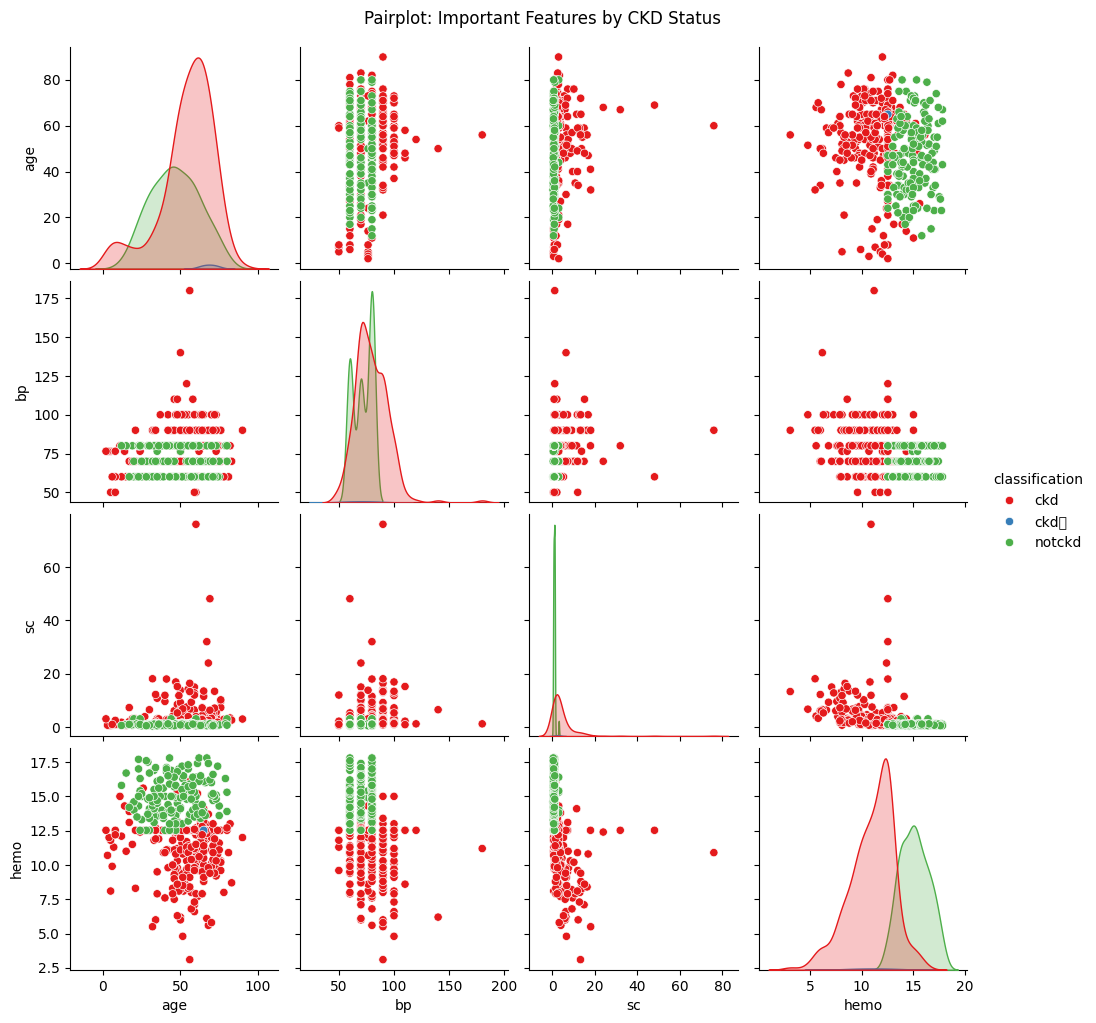

In [39]:
sns.pairplot(df, vars=['age', 'bp', 'sc', 'hemo'], hue='classification', palette='Set1')
plt.suptitle("Pairplot: Important Features by CKD Status", y=1.02)
plt.show()


In [40]:
df_numeric = df.select_dtypes(include=np.number)
corr_matrix = df_numeric.corr()


In [41]:
# Unstack the matrix and sort
high_corr = corr_matrix.unstack().sort_values(ascending=False)

# Remove self-correlations
high_corr = high_corr[high_corr < 1.0]

# Filter pairs with high correlation
high_corr_pairs = high_corr[abs(high_corr) > 0.85]

# Drop duplicate pairs (A-B and B-A)
high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated(keep='first')]

print("Highly Correlated Feature Pairs (|corr| > 0.85):")
print(high_corr_pairs)


Highly Correlated Feature Pairs (|corr| > 0.85):
Series([], dtype: float64)


## **CHECKING NO OF NULL VALUES THROUGH VISUALIZATION**

In [43]:
df.isnull()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **duplicated function:-**
##### The duplicated function checks the duplicate values present in the dataset.

In [45]:
# Check how many duplicate rows exist
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


In [48]:
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [49]:
from sklearn.preprocessing import LabelEncoder

# List of binary categorical features
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Apply Label Encoding
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [50]:
df.dtypes  # All columns should now be int or float


,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,int64
pc,int64
pcc,int64
ba,int64


In [51]:
df['classification'].value_counts()

,count
classification,
0,248
2,150
1,2


In [53]:
df['classification'] = df['classification'].astype(str).str.strip().str.lower()


In [58]:
df['classification'].value_counts()

,count
classification,
0,248
2,150
1,2


In [55]:
df['classification'].unique()

array(['0', '1', '2'], dtype=object)

In [59]:
# Map string categories to numeric values
df['classification'] = df['classification'].replace({'CKD': 1, 'not CKD': 0, '2': 1, '1': 0})


In [60]:
df['classification'].unique()

array(['0', 0, 1], dtype=object)

In [61]:
# Convert classification column to string first (to handle mixed types)
df['classification'] = df['classification'].astype(str)

# Replace '0' with 0 and '1' with 1 to ensure consistency
df['classification'] = df['classification'].replace({'0': 0, '1': 1})

# Finally, ensure the column is an integer type
df['classification'] = df['classification'].astype(int)

# Check the distribution of values again
df['classification'].value_counts()


<ipython-input-61-2f74f5bf49e0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df['classification'].replace({'0': 0, '1': 1})


,count
classification,
0,250
1,150


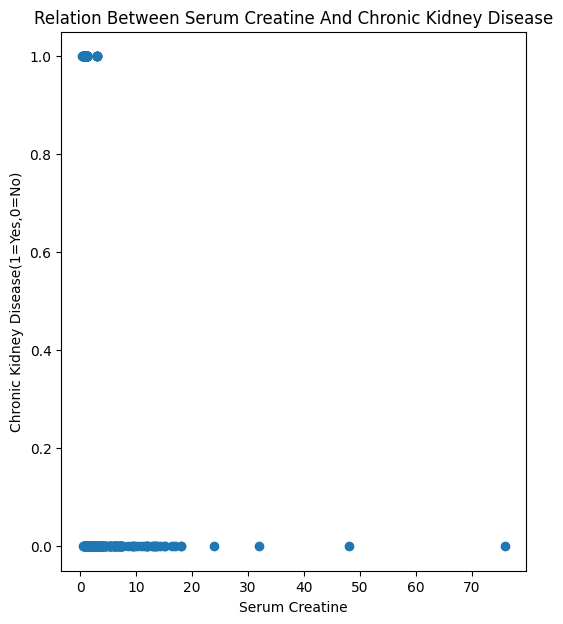

In [62]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['sc']]
N=df[['classification']]
plt.title("Relation Between Serum Creatine And Chronic Kidney Disease");
plt.xlabel("Serum Creatine")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

##### *Due to the hypertension mainly kidney failure occurs.*

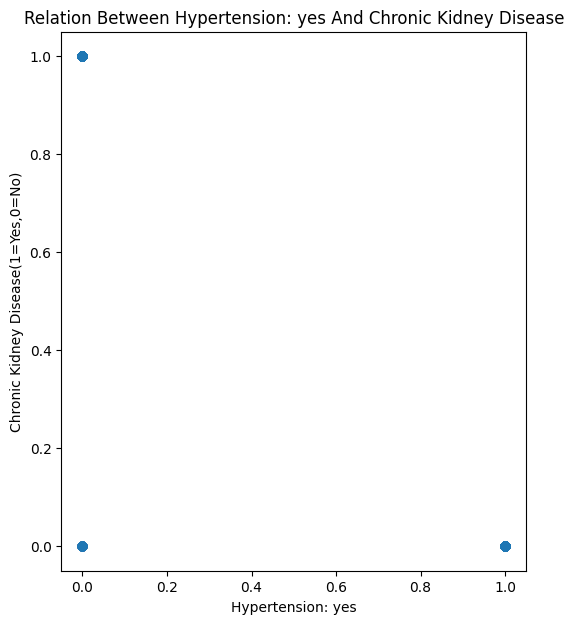

In [63]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['htn']]
N=df[['classification']]
plt.title("Relation Between Hypertension: yes And Chronic Kidney Disease");
plt.xlabel("Hypertension: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

##### *When urine albumin increses above its normal range then it first leads to protein leakage i.e, the first stage of the kidney failure if not treated or diagonosed at that time which leads to the kidney failure.*

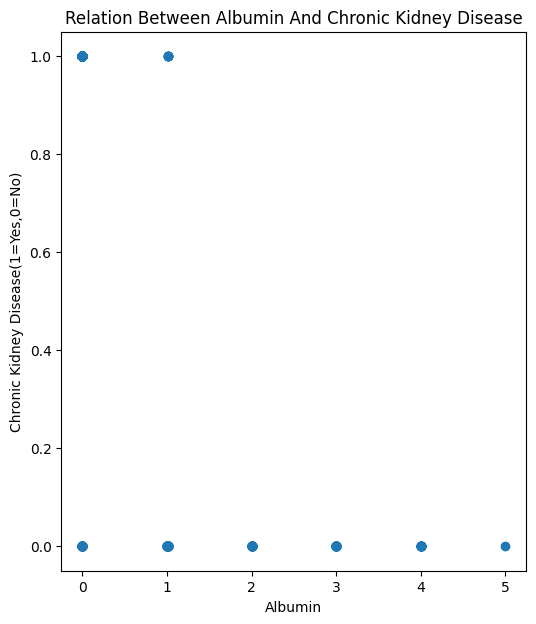

In [64]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['al']]
N=df[['classification']]
plt.title("Relation Between Albumin And Chronic Kidney Disease");
plt.xlabel("Albumin")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

##### *The diabetics is also one of the main reason for the kidney failure.*

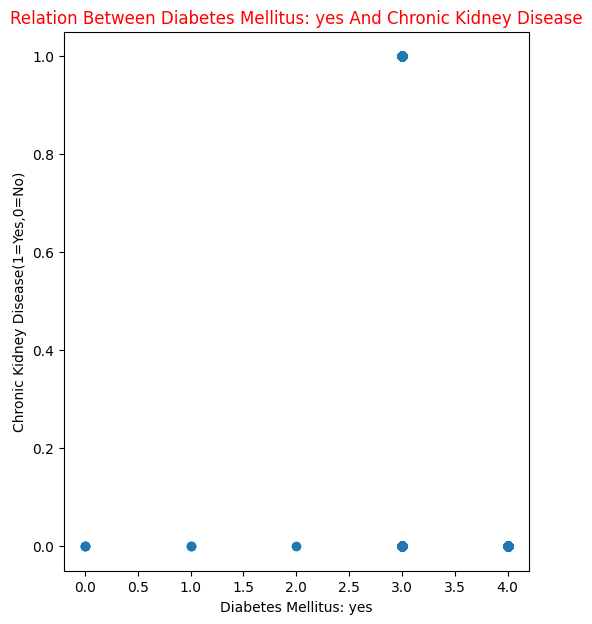

In [65]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['dm']]
N=df[['classification']]
plt.title("Relation Between Diabetes Mellitus: yes And Chronic Kidney Disease",color="red");
plt.xlabel("Diabetes Mellitus: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

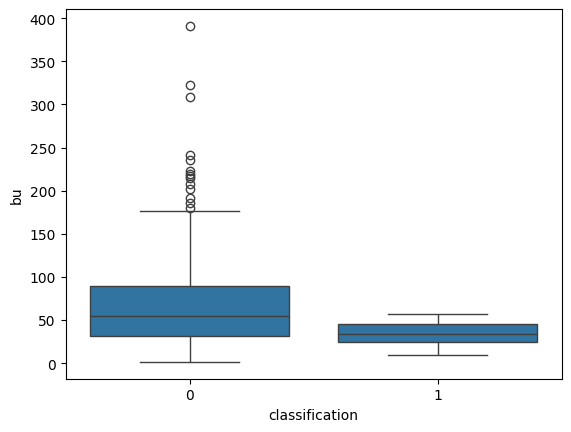

In [66]:
sns.boxplot(x=df['classification'], y=df['bu'])
plt.show();

In [68]:
# px.scatter_3d(df, x='age', y='htn', z='su', color='classification')

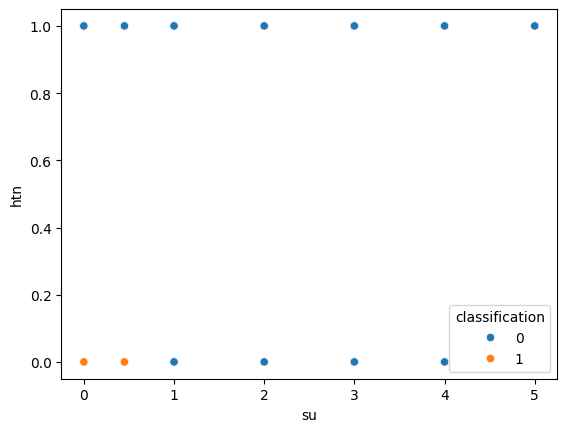

In [67]:
sns.scatterplot(data=df,x="su",y="htn",hue='classification');

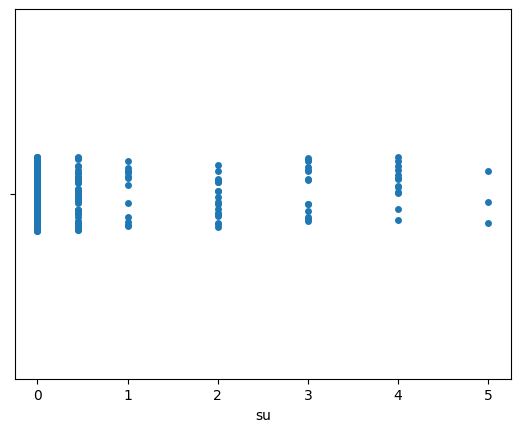

In [69]:
sns.stripplot(x=df["su"]);

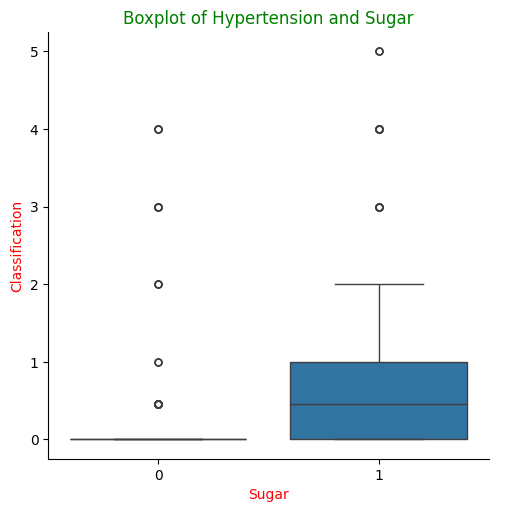

In [70]:
sns.catplot(x="htn",y="su",data=df,kind="box");
plt.xlabel("Sugar",color="red")
plt.ylabel("Classification",color="red")
plt.title("Boxplot of Hypertension and Sugar",color="green");

<ipython-input-71-b2f3f22544ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ane", y="hemo", palette='seismic')


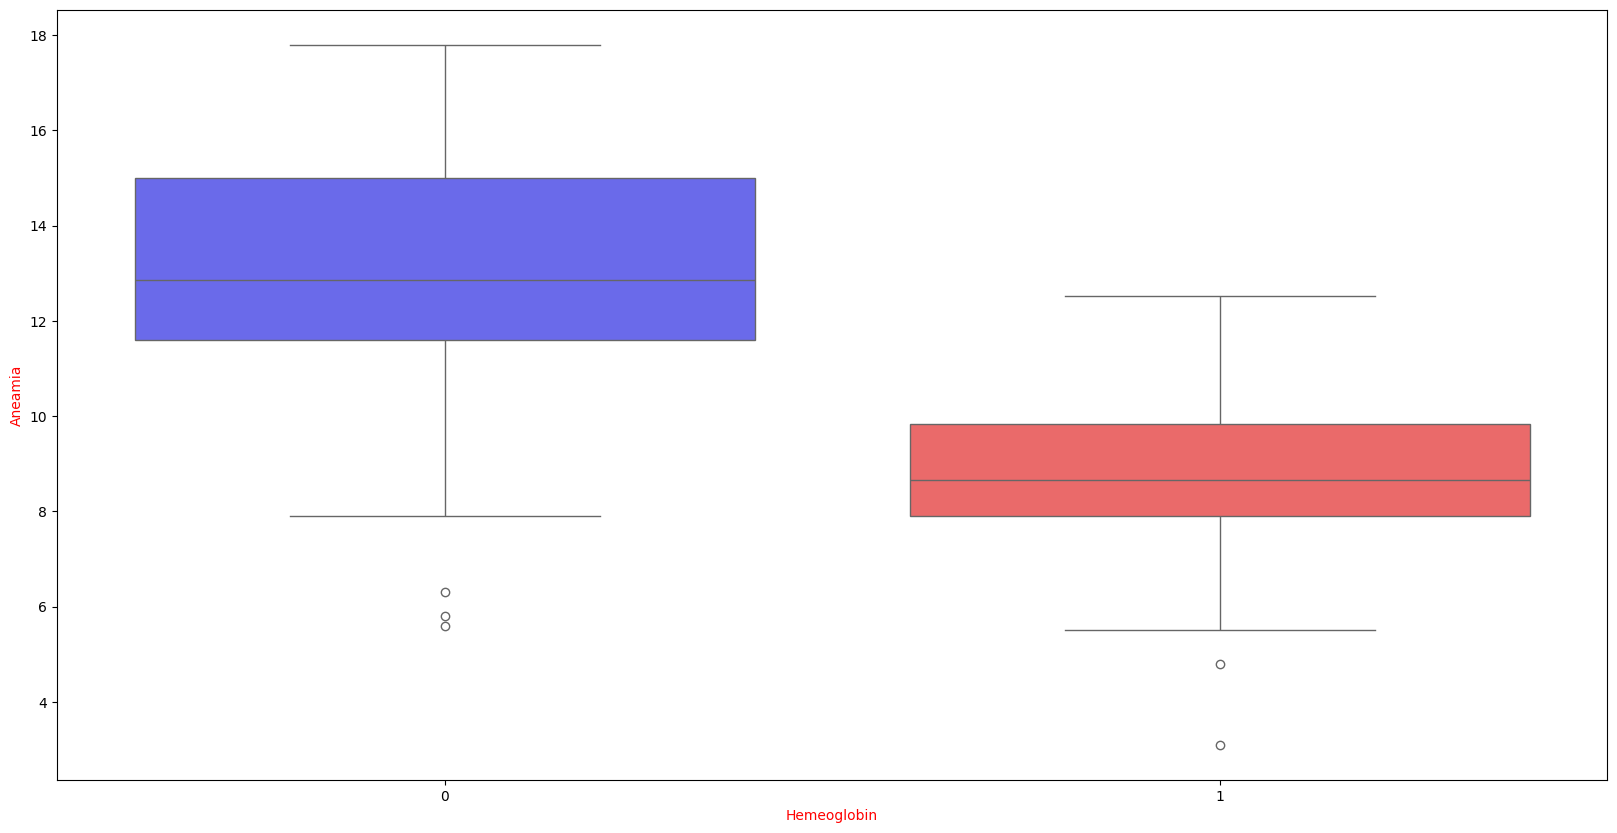

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="ane", y="hemo", palette='seismic')
plt.xlabel("Hemeoglobin",color="red")
plt.ylabel("Aneamia",color="red")
plt.show()

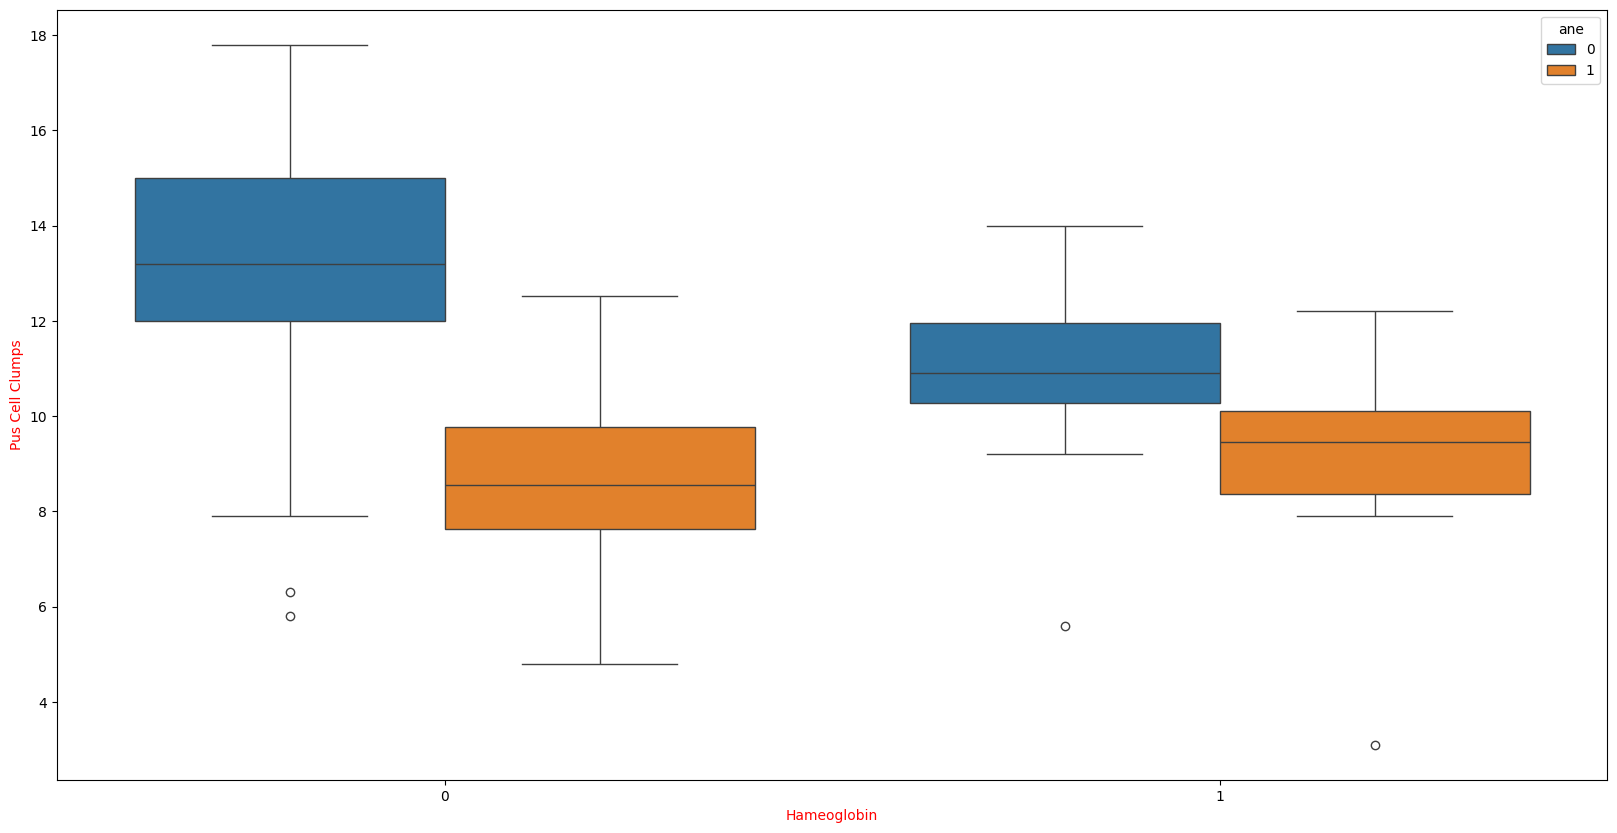

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, y='hemo', x="pcc", hue="ane")
plt.xlabel("Hameoglobin",color="red")
plt.ylabel("Pus Cell Clumps",color="red")
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=['classification', 'id'])  # Drop 'id' and target 'classification'
y = df['classification']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())


        age        bp        sg        al        su      rbc        pc  \
0 -0.205464  0.262338  0.483355 -0.013338 -0.437797  0.36489  0.484322   
1 -2.623810 -1.966580  0.483355  2.347516 -0.437797  0.36489  0.484322   
2  0.620313  0.262338 -1.381391  0.773613  2.479925  0.36489  0.484322   
3 -0.205464 -0.480635 -2.313764  2.347516 -0.437797  0.36489 -2.064742   
4 -0.028511  0.262338 -1.381391  0.773613 -0.437797  0.36489  0.484322   

        pcc        ba       bgr  ...      hemo       pcv        wc        rc  \
0 -0.342518 -0.241249 -0.361987  ...  1.059271  0.579238 -0.374666  0.380970   
1 -0.342518 -0.241249  0.000000  ... -0.452097 -0.153301 -1.067826  0.380970   
2 -0.342518 -0.241249  3.681441  ... -1.078762 -1.007929 -0.490192  0.380970   
3  2.919556 -0.241249 -0.415543  ... -0.488960 -0.885839 -0.798264 -0.893928   
4 -0.342518 -0.241249 -0.562820  ... -0.341509 -0.519570 -0.567210 -0.207444   

        htn        dm       cad     appet        pe       ane  
0  1.31190

# **Train Test Split**

In [76]:
from sklearn.model_selection import train_test_split

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(320, 24) (80, 24) (320,) (80,)


# **Modeling**

## **1.** ***Logistic Regression***
It is an supervised learning algorithm which is used for the solving classification problems.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Check for missing values in the scaled features before splitting
print("\nMissing values in X_scaled before splitting:")
print(X_scaled.isnull().sum()[X_scaled.isnull().sum() > 0])

# If there are still missing values, impute them.
# Using SimpleImputer for numerical data, e.g., with the mean strategy.
# This is a safeguard in case previous steps missed some NaNs or introduced new ones.
if X_scaled.isnull().sum().sum() > 0:
    print("\nImputing remaining missing values in X_scaled...")
    # Initialize imputer - using mean for numerical data as it is already scaled
    # Alternatively, consider the median or a more sophisticated imputer.
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Fit and transform the scaled data
    X_scaled = pd.DataFrame(imputer.fit_transform(X_scaled), columns=X_scaled.columns)
    print("Imputation complete. Checking for missing values again:")
    print(X_scaled.isnull().sum().sum())


# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("\nShape of splits:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Verify no NaNs in training data before passing to model
print("\nMissing values in X_train before training:")
print(X_train.isnull().sum().sum())


Missing values in X_scaled before splitting:
pcv    1
wc     1
rc     1
dtype: int64

Imputing remaining missing values in X_scaled...
Imputation complete. Checking for missing values again:
0

Shape of splits:
(320, 24) (80, 24) (320,) (80,)

Missing values in X_train before training:
0


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report for more detailed evaluation (precision, recall, F1 score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 98.75%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

